In [105]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

In [106]:
filename = 'data/bq-results-20211105-102236-1pg8as4q8dgo.csv'
df = pd.read_csv(filename, dtype={"ping_average_latency": float, 
                                  "iperf_throughput_1_thread": float,
                                  "iperf_throughput_32_thread": float})

################# Data prep #################
df[['vm_1_gce_network_tier',
    'vm_2_gce_network_tier']] = df[['vm_1_gce_network_tier',
                                    'vm_2_gce_network_tier']].fillna(value='premium')
df[['tcp_max_receive_buffer']] = df[['tcp_max_receive_buffer']].fillna(value=6291456)
# df = df.set_index('thedate')
# query = 'vm_1_machine_type == "n1-standard-16" and ip_type == "internal" and vm_1_gce_network_tier == "premium"'
# df = df.query(query)
df = df[df['iperf_throughput_1_thread'].notnull()]
df = df[df['ping_average_latency'].notnull()]
df = df[df['sending_zone'].notnull()]
df = df[df['receiving_zone'].notnull()]
# df = df[df['vm_1_cloud'].notnull()]
# df = df[df['vm_2_cloud'].notnull()]
df[['pandas_datetime']] = pd.to_datetime(df.thedate)

/home/derek/projects/ml/tf_env/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3169: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8,9,10,11,12,14,20,45,58,59,82,83,84) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [107]:
df.sort_values(by=['iperf_timestamp', 'run_uri'], inplace=True, ascending=True)

In [108]:
df = df.set_index('thedate')

In [109]:
one_hot_machine_type = pd.get_dummies(df['vm_1_machine_type'], dtype='float')
df = df.join(one_hot_machine_type)
one_hot_ip_type = pd.get_dummies(df['ip_type'], dtype='float')
df = df.join(one_hot_ip_type)

In [110]:
# trim vm_1_os_info field
df['vm_1_os_info_trunc'] = df['vm_1_os_info'].str.extract(r'(\w+\s+\d+.\d+).\d+\s+\w+')

In [111]:
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", 20)
df.head()
# df[df.run_uri == 'cd2f3786-76a37a69-2dfd-4f89-adf5-5511e9c5576c']

,run_uri,vm_1_cloud,vm_2_cloud,sending_zone,receiving_zone,vm_1_machine_type,vm_2_machine_type,ip_type,vm_1_gce_network_tier,vm_2_gce_network_tier,ping_unit,vm_1_kernel_release,vm_2_kernel_release,rmem_max,tcp_congestion_control,tcp_max_receive_buffer,tcp_max_send_buffer,vm_1_wmem_max,ping_interval_time_us,ping_transaction_count,ping_timestamp,ping_max_latency,ping_min_latency,ping_average_latency,ping_latency_std_dev,sending_machine_type,receiving_machine_type,timestamp,TCP_RR_Latency_p90,TCP_RR_Latency_p99,TCP_RR_Latency_p50,TCP_RR_Latency_stddev,TCP_RR_Latency_mean,TCP_RR_Transaction_Rate,TCP_RR_Latency_Histogram,TCP_RR_Latency_max,TCP_RR_Latency_min,UDP_RR_Latency_max,UDP_RR_Latency_p90,UDP_RR_Latency_min,UDP_RR_Latency_mean,UDP_RR_Latency_p50,UDP_RR_Latency_p99,UDP_RR_Latency_stddev,UDP_RR_Latency_Histogram,TCP_STREAM_Throughput_total_1_thread,TCP_STREAM_Throughput_total_4_threads,TCP_STREAM_Throughput_total_32_threads,TCP_STREAM_Throughput_average_4_threads,TCP_STREAM_Throughput_average_32_threads,TCP_STREAM_Throughput_stddev_4_threads,TCP_STREAM_Throughput_stddev_32_threads,iperf_unit,date_time,iperf_timestamp,vm_1_os_info,vm_2_os_info,vm_1_os_type,vm_2_os_type,iperf_throughput_1_thread,iperf_throughput_4_threads,iperf_throughput_5_threads,iperf_throughput_32_threads,iperf_netpwr_1_thread,iperf_netpwr_4_threads,iperf_netpwr_32_threads,iperf_cwnd_1_thread,iperf_cwnd_4_threads,iperf_cwnd_32_threads,iperf_err_1_thread,iperf_err_4_threads,iperf_err_32_threads,iperf_write_1_thread,iperf_write_4_threads,iperf_write_32_threads,iperf_retry_1_thread,iperf_retry_4_threads,iperf_retry_32_threads,ipert_rtt_1_thread,ipert_rtt_4_threads,ipert_rtt_32_threads,ipert_rtt_unit_1_thread,ipert_rtt_unit_4_threads,ipert_rtt_unit_32_threads,iperf_reported_buffer_size_1_thread,iperf_reported_buffer_size_4_threads,iperf_reported_buffer_size_32_threads,pandas_datetime,n1-standard-16,n1-standard-2,external,internal,vm_1_os_info_trunc
thedate,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2019-04-29 16:52:38.241408 UTC,b5399e57-e5a13df1-e8fa-43c4-a1be-c242f17231b2,GCP,GCP,us-west1-b,asia-northeast1-a,n1-standard-2,n1-standard-2,internal,premium,premium,ms,4.4.0-146-generic,4.4.0-146-generic,NaN,cubic,6291456.0,NaN,NaN,NaN,NaN,1.556557e+09,94.122,88.240,88.456,0.688,n1-standard-2,n1-standard-2,1.556558e+09,88700.0,88900.0,88400.0,3387.093859,NaN,NaN,"{""176000.0"": 3, ""88200.0"": 406, ""91500.0"": 1, ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1057.09,NaN,264.2725,NaN,2.346719,NaN,Mbits/sec,2019-04-29 16:59:43.833609 UTC,1.556557e+09,Ubuntu 14.04.6 LTS,Ubuntu 14.04.6 LTS,NaN,NaN,246.0,NaN,NaN,3817.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-04-29 16:52:38.241408+00:00,0.0,1.0,0.0,1.0,Ubuntu 14.04
2019-04-29 16:52:39.188728 UTC,b5399e57-176b99d1-027d-4b53-91c5-09ddf791e148,GCP,GCP,us-west1-b,asia-northeast1-a,n1-standard-2,n1-standard-2,internal,standard,standard,ms,4.4.0-146-generic,4.4.0-146-generic,NaN,cubic,6291456.0,NaN,NaN,NaN,NaN,1.556557e+09,88.520,88.274,88.374,0.143,n1-standard-2,n1-standard-2,1.556558e+09,88600.0,88800.0,88500.0,3388.226436,NaN,NaN,"{""88800.0"": 12, ""92000.0"": 1, ""176000.0"": 1, ""...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1078.84,NaN,269.7100,NaN,4.860775,NaN,Mbits/sec,2019-04-29 16:59:44.681262 UTC,1.556557e+09,Ubuntu 14.04.6 LTS,Ubuntu 14.04.6 LTS,NaN,NaN,276.0,NaN,NaN,3836.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-04-29 16:52:39.188728+00:00,0.0,1.0,0.0,1.0,Ubuntu 14.04
2019-04-29 16:54:20.89529 UTC,b5399e57-e5a13df1-e8fa-43c4-a1be-c242f17231b2,GCP,GCP,asia-northeast1-a,us-west1-b,n1-standard-2,n1-standard-2,internal,premium,premium,ms,4.4.0-146-generic,4.4.0-146-generic,NaN,cubic,6291456.0,NaN,NaN,NaN,NaN,1.556557e+09,88.629,88.370,88.435,0.383,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [112]:
gb = df.groupby(['sending_zone',
                 'receiving_zone',
                 'tcp_max_receive_buffer',
                 'vm_1_machine_type',
                 'ip_type',
                 'tcp_congestion_control',
                 'vm_1_os_info_trunc'], 
                as_index=False)[[
                                  # 'thedate',
                                  # 'sending_zone',
                                  # 'receiving_zone',
                                  'pandas_datetime',
                                  'iperf_throughput_1_thread',
                                  'iperf_throughput_32_threads',
                                  'tcp_max_receive_buffer',
                                  'ping_average_latency',
#                                   'vm_1_machine_type',
#                                   'ip_type',
                                  'n1-standard-16',
                                  'n1-standard-2',
                                  'external',
                                  'internal',
                                  'tcp_congestion_control',
                                ]]

In [113]:
list(gb.groups)[0:5]

[('asia-east1-b',
  'asia-east2-a',
  500000000.0,
  'n1-standard-16',
  'external',
  'bbr',
  'Ubuntu 18.04'),
 ('asia-east1-b',
  'asia-east2-a',
  500000000.0,
  'n1-standard-16',
  'external',
  'bbr',
  'Ubuntu 20.04'),
 ('asia-east1-b',
  'asia-east2-a',
  500000000.0,
  'n1-standard-16',
  'external',
  'cubic',
  'Ubuntu 16.04'),
 ('asia-east1-b',
  'asia-east2-a',
  500000000.0,
  'n1-standard-16',
  'external',
  'cubic',
  'Ubuntu 18.04'),
 ('asia-east1-b',
  'asia-east2-a',
  500000000.0,
  'n1-standard-16',
  'external',
  'cubic',
  'Ubuntu 20.04')]

In [114]:
group_list = list(gb.groups)
g = group_list[0]

In [115]:
max_len = 0
for i in list(gb.groups):
  l = len(gb.get_group(i).values.tolist())
  if l > max_len:
    max_len = l
    
max_len

852

In [116]:
g = group_list[4]
g

('asia-east1-b',
 'asia-east2-a',
 500000000.0,
 'n1-standard-16',
 'external',
 'cubic',
 'Ubuntu 20.04')

In [117]:
group_values = gb.get_group(g).values.tolist()

In [118]:
group_values[0]

[Timestamp('2021-05-05 11:38:46.188374+0000', tz='UTC'),
 6441.0,
 6740.0,
 500000000.0,
 12.883,
 1.0,
 0.0,
 1.0,
 0.0,
 'cubic']

In [119]:
timestamps = []
iperf_32_values = []
for value in group_values:
  timestamps.append(value[0])
  iperf_32_values.append(value[2])

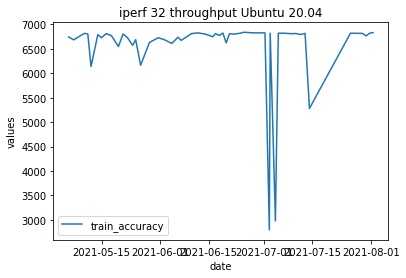

In [120]:
plt.plot(timestamps,iperf_32_values)
# plt.plot(train_history.history['val_accuracy'])
plt.title(f'iperf 32 throughput {g[6]}')
plt.ylabel('values')
plt.legend(['train_accuracy'])
plt.xlabel('date')
# plt.legend(['no_error', '0.1 error rate'], loc='upper left')
plt.show()


In [121]:
len(group_values)

50

In [122]:
max_time_delta_sec = 30 * 60 * 60
difference = group_values[1][0] - group_values[0][0]
difference.total_seconds()

124589.407414

In [123]:
max_time_delta_sec 

108000

In [124]:
def min_percent_index(num, percent, offset):
    min_index = round((num-1)*percent) + offset
    if min_index >= num:
        min_index = num-1
    return min_index

def max_percent_index(num, percent, offset):
    max_index = round((num-1)*percent) + offset
    if max_index >= num:
        max_index = num-1
    return max_index

In [125]:
group_list_position = 0
horizon = 0
window = 5
step = 1
# Max time delta = 30 hours
max_time_delta_sec = 30 * 60 * 60
current_group = group_list[group_list_position]
min_index = 0
max_index = 69
max_index = max_index - horizon
i = min_index + window

sample_list = []
target_list = []

rows = np.arange(i, max_index+1)
  # print("i: ", i)
  # print("max index: ", max_index)
  # print(rows)

for j,row in enumerate(rows):
  low_index = rows[j] - window
  high_index = rows[j]
  sample = group_values[low_index:high_index:step]
  target = group_values[rows[j] + horizon]
  
  # Check dates of sample to make sure there are no gaps
  bad_sample = False
  for sample_index in range(1, len(sample)):
    difference = sample[sample_index][0] - sample[sample_index-1][0]
    delta_in_seconds = difference.total_seconds()
    if delta_in_seconds > max_time_delta_sec:
      bad_sample = True
  
  if bad_sample:
    continue
    

  # print("j: ", rows[j])
  # print(sample)
  # print(target)
  sample_list.append(sample)
  target_list.append(target)

IndexError: list index out of range

In [126]:
len(sample_list)

3

In [127]:
sample_list[0]

[[Timestamp('2021-06-16 05:43:05.502055+0000', tz='UTC'),
  5134.0,
  6746.0,
  500000000.0,
  12.796,
  1.0,
  0.0,
  1.0,
  0.0,
  'cubic'],
 [Timestamp('2021-06-16 23:37:56.496376+0000', tz='UTC'),
  5105.0,
  6810.0,
  500000000.0,
  12.853,
  1.0,
  0.0,
  1.0,
  0.0,
  'cubic'],
 [Timestamp('2021-06-18 03:28:00.344294+0000', tz='UTC'),
  4337.0,
  6772.0,
  500000000.0,
  12.854,
  1.0,
  0.0,
  1.0,
  0.0,
  'cubic'],
 [Timestamp('2021-06-19 03:46:03.769874+0000', tz='UTC'),
  5417.0,
  6821.0,
  500000000.0,
  12.998,
  1.0,
  0.0,
  1.0,
  0.0,
  'cubic'],
 [Timestamp('2021-06-20 02:41:26.877409+0000', tz='UTC'),
  5773.0,
  6620.0,
  500000000.0,
  12.606,
  1.0,
  0.0,
  1.0,
  0.0,
  'cubic']]

In [128]:
import pandas_data_util

In [129]:
filename = 'data/bq-results-20211029-114839-fy49t32j30hp.csv'
train_percent=0.6
valid_percent=0.2
normalize=0
Data = pandas_data_util.DataUtil(filename,
                train_percent,
                valid_percent,
                horizon,
                window,
                normalize)

/home/derek/projects/ml/tf_env/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3361: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8,9,10,11,12,14,18,19,43,44,45,49,50,74,75,76,77,79,90,91) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


In [140]:
Data.train[0][2]

array([[Timestamp('2021-08-05 20:29:46.575553+0000', tz='UTC'),
        -0.03986454045610948, -0.7725354340405309, 0.42092811657562634,
        -1.1351330071916452, 1.0, 0.0, 1.0, 0.0, 'bbr'],
       [Timestamp('2021-08-06 21:29:39.466611+0000', tz='UTC'),
        0.07552882752878384, -0.7772921500202391, 0.42092811657562634,
        -1.1353747154978142, 1.0, 0.0, 1.0, 0.0, 'bbr'],
       [Timestamp('2021-08-07 22:46:04.533854+0000', tz='UTC'),
        0.08329788596737073, -0.7765353997507402, 0.42092811657562634,
        -1.1355218422928735, 1.0, 0.0, 1.0, 0.0, 'bbr'],
       [Timestamp('2021-08-08 23:43:31.119014+0000', tz='UTC'),
        -0.09013491858814221, -0.7780489002897382, 0.42092811657562634,
        -1.1387376136705991, 1.0, 0.0, 1.0, 0.0, 'bbr'],
       [Timestamp('2021-08-10 00:46:33.860539+0000', tz='UTC'),
        -0.1829066164136208, -0.7784813290151662, 0.42092811657562634,
        -1.1357215143718826, 1.0, 0.0, 1.0, 0.0, 'bbr']], dtype=object)

In [131]:
Data.train[1][0]

array([Timestamp('2021-08-08 23:43:31.119014+0000', tz='UTC'),
       -0.09013491858814221, -0.7780489002897382, 0.42092811657562634,
       -1.1387376136705991, 1.0, 0.0, 1.0, 0.0, 'bbr'], dtype=object)

In [132]:
len(Data.train[0])

68575

In [133]:
len(Data.test[0])

21023

In [134]:
len(Data.valid[0])

18141